In [65]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import os
import seaborn as sns
import plotly.graph_objects as go

In [6]:
csv_filename = 'csvtrade.csv'
csv_path = os.path.abspath(csv_filename)

df = pd.read_csv(csv_filename)

In [11]:
df.columns

Index(['Trade ID', 'Asset', 'Date', 'Time', 'Stop Loss', 'Trade Type',
       'System Strategy', 'Timeframe', 'HTF Trend', 'Trade From',
       'Day of Week', 'Direction', 'Result', 'R', 'Rolling R'],
      dtype='object')

In [26]:
asset_return = df.groupby('Asset')['R'].sum().sort_values(ascending=False).round(2)
asset_return

Asset
USDCAD    5.76
GBPJPY    1.75
EURUSD    1.71
XAUUSD    1.42
AUDUSD    1.20
GBPUSD    0.74
USDJPY   -0.68
NZDUSD   -0.80
AUS200   -1.00
audcad   -1.00
AUDCAD   -1.01
Name: R, dtype: float64

In [64]:
df['R'].sum().round(2)

8.09

In [39]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [55]:
plt.style.use('seaborn-v0_8-darkgrid')

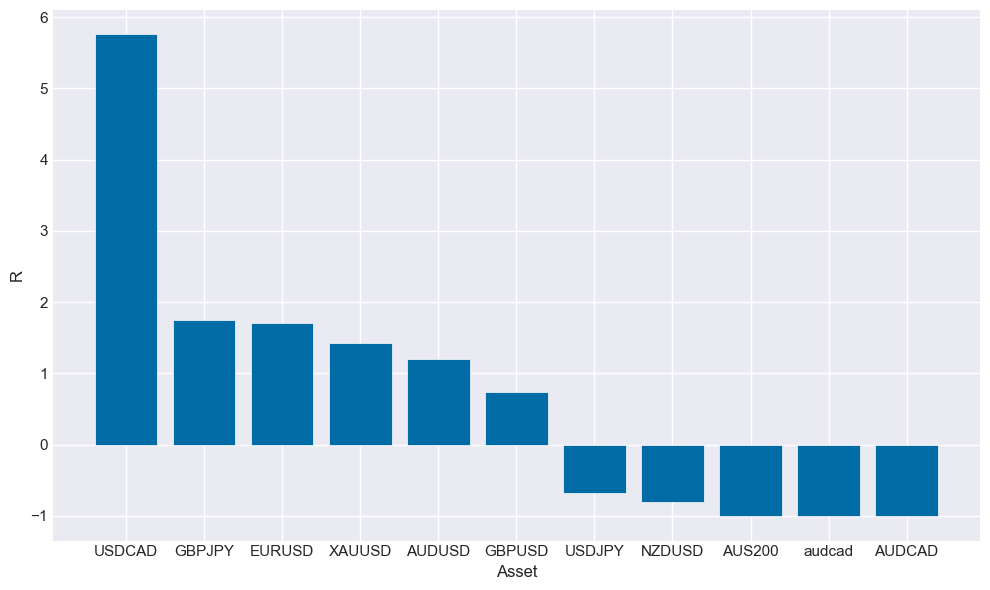

In [57]:
plt.figure(figsize=(10, 6))
plt.bar(asset_return.index, asset_return.values)
plt.xlabel('Asset')
plt.ylabel('R')
plt.tight_layout()



In [77]:
wins = df[df['R'] > 0]['R'].count()
losses = df[df['R'] < 0]['R'].count()
total_trades = wins + losses
strike_rate = wins / total_trades
round(strike_rate * 100, 2)

43.9

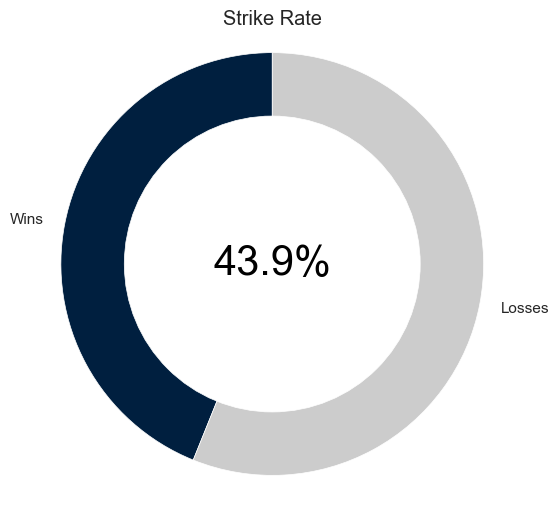

In [88]:
# Create labels and data for the chart
labels = ['Wins', 'Losses']
sizes = [wins, losses]

# Set colors for the chart
colors = ['#001F3F', '#CCCCCC']

# Create a donut chart
fig, ax = plt.subplots(figsize=(6, 6))
wedges, texts, autotexts = ax.pie(sizes, labels=labels, colors=colors, autopct='', startangle=90, wedgeprops={'edgecolor': 'white'})

# Draw a white circle at the center to create the donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Calculate and display win percentage in the center
win_percentage = round((wins / total_trades) * 100, 2)
ax.text(0, 0, f'{win_percentage}%', fontsize=30, color='black', va='center', ha='center')

ax.axis('equal')
ax.set_title('Strike Rate')

plt.show()

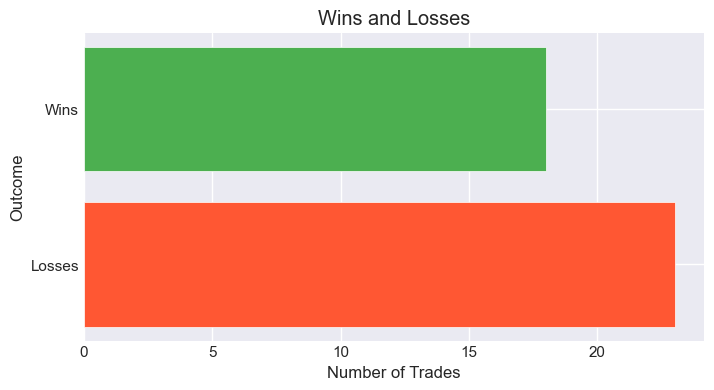

In [84]:
# Create labels and data for the chart
labels = ['Wins', 'Losses']
sizes = [wins, losses]

# Set colors for the chart
colors = ['#4CAF50', '#FF5733']

# Create a horizontal bar chart
plt.figure(figsize=(8, 4))
plt.barh(labels, sizes, color=colors)
plt.xlabel('Number of Trades')
plt.ylabel('Outcome')
plt.title('Wins and Losses')
plt.gca().invert_yaxis()  # Invert y-axis to have 'Wins' on top
plt.show()